In [46]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os

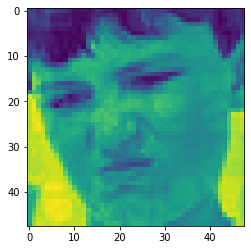

In [2]:
orgin_img = Image.open('./Training/Disgust/10018.jpg')
orgin_img = np.array(orgin_img)
plt.imshow(orgin_img)
plt.show()

In [3]:
IMG_SHAPE = orgin_img.shape
IMG_SHAPE

(48, 48)

In [9]:
noise = np.random.randint(low = -5, high=5, size = IMG_SHAPE)
noise

array([[-1,  2, -5, ...,  3,  2,  4],
       [ 2,  4,  4, ..., -5,  1,  4],
       [-5, -2,  0, ..., -2,  1, -3],
       ...,
       [-5, -2,  4, ...,  1, -5,  0],
       [ 4, -4, -1, ...,  3,  4,  2],
       [ 4,  4,  1, ...,  2,  1, -3]])

In [10]:
noise_img = np.array(orgin_img)

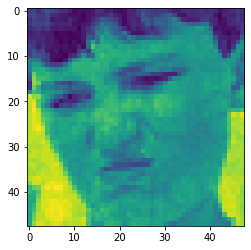

In [11]:
for i in range(48):
    for j in range(48):
        noise_img[i][j] += noise[i][j]
        
plt.imshow(noise_img)
plt.show()

In [12]:
orgin_img, noise_img

(array([[ 47,  47,  36, ...,  33,  41,  31],
        [ 50,  54,  40, ...,  30,  37,  28],
        [ 42,  53,  42, ...,  34,  42,  35],
        ...,
        [137, 175, 202, ..., 212, 211, 194],
        [137, 185, 208, ..., 167, 204, 198],
        [131, 188, 214, ..., 168, 202, 201]], dtype=uint8),
 array([[ 46,  49,  31, ...,  36,  43,  35],
        [ 52,  58,  44, ...,  25,  38,  32],
        [ 37,  51,  42, ...,  32,  43,  32],
        ...,
        [132, 173, 206, ..., 213, 206, 194],
        [141, 181, 207, ..., 170, 208, 200],
        [135, 192, 215, ..., 170, 203, 198]], dtype=uint8))

In [19]:
import cv2 as cv
import numpy as np

In [60]:
class Data_Augmentation:
    def __init__(self, path, file_name):
        '''
        Import image
        :param path : Path to the image
        :param file_name : image file name
        '''
        self.path = path
        self.name = file_name
        print('file path : ' + path+file_name)
        self.image = cv.imread(path+file_name)
        
    def rotate(self, image, angle=90, scale=1.0):
        '''
        Rotate the image
        :param image : image to be processed
        :param angle : Rotation angle in degrees. Positive values mean counter-clockwise rotation
        :param scale : Isotropic scale factor
        '''
        
        w = image.shape[1]
        h = image.shape[0]
        
        # Rotate matrix
        M = cv.getRotationMatrix2D((w/2, h/2), angle, scale)
        # rotate
        image = cv.warpAffine(image, M,(w,h))
        
        return image
    
    def flip(self, image, vflip=False, hflip=False):
        '''
        Flip the image 
        
        :param image : image to be processed
        :param vflip : whether to flip the image vertically
        :param hflip : whether to flip the image horizaontally
        '''
        
        if hflip or vflip:
            if hflip and vflip:
                c = -1
            else: 
                c = 0 if vflip else 1
            
            image = cv.flip(image, flipCode=c)
            
        return image
    
    def add_gussian_noise(self, image, std=64):
        
        w = image.shape[1]
        h = image.shape[0]
        
        noise =np.zeros(image.shape)
        for h in range(h):
            for w in range(w):
                std_norm = np.random.normal()
                random_noise = std*std_norm
                image[h, w] = image[h, w] + random_noise
                
        return image
        
    
    def image_augment(self, save_path):
        '''
        Create the new image with image augmentation
        :param path: the path to store the new image      
        '''
        
        img = self.image.copy()
        img_flip = self.flip(img, vflip=True, hflip=False)
        img_rot = self.rotate(img)
        img_gaussian = self.add_gussian_noise(img)
        
        name_init = self.name[:len(self.name)-4]
        cv.imwrite(save_path+'%s' %str(name_init)+'_vflip.jpg', img_flip)
        cv.imwrite(save_path+'%s' %str(name_init)+'_rot.jpg', img_rot)
        cv.imwrite(save_path+'%s' %str(name_init)+'_GussianNoise.jpg', img_gaussian)


In [61]:
def main(file_dir, output_path):
    for root, _, files in os.walk(file_dir):
        print(root)
        
    for file in files:
        raw_image = Data_argumentation(root, file)
        raw_image.image_augment(output_path)

    print('Finish')

In [62]:
main('./Training/Disgust/','./Training/Disgust/')

./Training/Disgust/
file path : ./Training/Disgust/28390-Copy1.jpg
file path : ./Training/Disgust/4002-Copy1.jpg
file path : ./Training/Disgust/8415-Copy1.jpg
file path : ./Training/Disgust/26325.jpg
file path : ./Training/Disgust/15430.jpg
file path : ./Training/Disgust/2005.jpg
file path : ./Training/Disgust/16021.jpg
file path : ./Training/Disgust/1310.jpg
file path : ./Training/Disgust/24114-Copy1.jpg
file path : ./Training/Disgust/22630-Copy1.jpg
file path : ./Training/Disgust/27201-Copy1.jpg
file path : ./Training/Disgust/9679-Copy1.jpg
file path : ./Training/Disgust/4908-Copy1.jpg
file path : ./Training/Disgust/20325-Copy1.jpg
file path : ./Training/Disgust/2746.jpg
file path : ./Training/Disgust/24578.jpg
file path : ./Training/Disgust/19907.jpg
file path : ./Training/Disgust/7049.jpg
file path : ./Training/Disgust/16382.jpg
file path : ./Training/Disgust/2695-Copy1.jpg
file path : ./Training/Disgust/21851.jpg
file path : ./Training/Disgust/19734.jpg
file path : ./Training/Disg

file path : ./Training/Disgust/10521-Copy1.jpg
file path : ./Training/Disgust/21765.jpg
file path : ./Training/Disgust/21422.jpg
file path : ./Training/Disgust/14140-Copy1.jpg
file path : ./Training/Disgust/19251.jpg
file path : ./Training/Disgust/1096-Copy1.jpg
file path : ./Training/Disgust/16219.jpg
file path : ./Training/Disgust/14954.jpg
file path : ./Training/Disgust/10112-Copy1.jpg
file path : ./Training/Disgust/23123.jpg
file path : ./Training/Disgust/19991.jpg
file path : ./Training/Disgust/25847-Copy1.jpg
file path : ./Training/Disgust/17252.jpg
file path : ./Training/Disgust/7704-Copy1.jpg
file path : ./Training/Disgust/3195.jpg
file path : ./Training/Disgust/7704.jpg
file path : ./Training/Disgust/20225-Copy1.jpg
file path : ./Training/Disgust/8509-Copy1.jpg
file path : ./Training/Disgust/9366-Copy1.jpg
file path : ./Training/Disgust/25095.jpg
file path : ./Training/Disgust/24114.jpg
file path : ./Training/Disgust/11731.jpg
file path : ./Training/Disgust/24155-Copy1.jpg
fil

file path : ./Training/Disgust/15287-Copy1.jpg
file path : ./Training/Disgust/826-Copy1.jpg
file path : ./Training/Disgust/12875.jpg
file path : ./Training/Disgust/18352-Copy1.jpg
file path : ./Training/Disgust/20137-Copy1.jpg
file path : ./Training/Disgust/6780-Copy1.jpg
file path : ./Training/Disgust/16205.jpg
file path : ./Training/Disgust/9716-Copy1.jpg
file path : ./Training/Disgust/12906-Copy1.jpg
file path : ./Training/Disgust/8692.jpg
file path : ./Training/Disgust/21422-Copy1.jpg
file path : ./Training/Disgust/20335-Copy1.jpg
file path : ./Training/Disgust/23141.jpg
file path : ./Training/Disgust/13597-Copy1.jpg
file path : ./Training/Disgust/845-Copy1.jpg
file path : ./Training/Disgust/17719-Copy1.jpg
file path : ./Training/Disgust/14257-Copy1.jpg
file path : ./Training/Disgust/1265.jpg
file path : ./Training/Disgust/22055.jpg
file path : ./Training/Disgust/22196-Copy1.jpg
file path : ./Training/Disgust/24639.jpg
file path : ./Training/Disgust/1619-Copy1.jpg
file path : ./Tra

file path : ./Training/Disgust/6867.jpg
file path : ./Training/Disgust/15850.jpg
file path : ./Training/Disgust/20748.jpg
file path : ./Training/Disgust/758-Copy1.jpg
file path : ./Training/Disgust/16054.jpg
file path : ./Training/Disgust/14858-Copy1.jpg
file path : ./Training/Disgust/28232-Copy1.jpg
file path : ./Training/Disgust/14954-Copy1.jpg
file path : ./Training/Disgust/20761.jpg
file path : ./Training/Disgust/20748-Copy1.jpg
file path : ./Training/Disgust/9504.jpg
file path : ./Training/Disgust/7313.jpg
file path : ./Training/Disgust/12620-Copy1.jpg
file path : ./Training/Disgust/7386-Copy1.jpg
file path : ./Training/Disgust/25717.jpg
file path : ./Training/Disgust/4882-Copy1.jpg
file path : ./Training/Disgust/10018.jpg
file path : ./Training/Disgust/27925.jpg
file path : ./Training/Disgust/12417-Copy1.jpg
file path : ./Training/Disgust/6562.jpg
file path : ./Training/Disgust/1975.jpg
file path : ./Training/Disgust/9189.jpg
file path : ./Training/Disgust/9464.jpg
file path : ./

file path : ./Training/Disgust/9204-Copy1.jpg
file path : ./Training/Disgust/28029-Copy1.jpg
file path : ./Training/Disgust/5203.jpg
file path : ./Training/Disgust/10732.jpg
file path : ./Training/Disgust/1265-Copy1.jpg
file path : ./Training/Disgust/23123-Copy1.jpg
file path : ./Training/Disgust/10705-Copy1.jpg
file path : ./Training/Disgust/26324-Copy1.jpg
file path : ./Training/Disgust/4969.jpg
file path : ./Training/Disgust/13372-Copy1.jpg
file path : ./Training/Disgust/19801.jpg
file path : ./Training/Disgust/4706-Copy1.jpg
file path : ./Training/Disgust/9204.jpg
file path : ./Training/Disgust/8675.jpg
file path : ./Training/Disgust/11223.jpg
file path : ./Training/Disgust/14774-Copy1.jpg
file path : ./Training/Disgust/22746-Copy1.jpg
file path : ./Training/Disgust/16386.jpg
file path : ./Training/Disgust/27201.jpg
file path : ./Training/Disgust/3292.jpg
file path : ./Training/Disgust/3516.jpg
file path : ./Training/Disgust/18134.jpg
file path : ./Training/Disgust/16205-Copy1.jpg


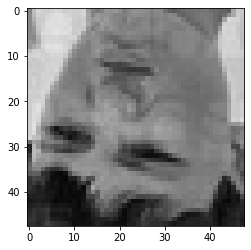

In [64]:
orgin_img = Image.open('./Training/Disgust/10018_vflip.jpg')
orgin_img = np.array(orgin_img)
plt.imshow(orgin_img)
plt.show()

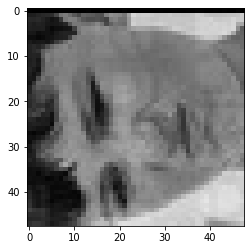

In [66]:
orgin_img = Image.open('./Training/Disgust/10018_rot.jpg')
orgin_img = np.array(orgin_img)
plt.imshow(orgin_img)
plt.show()

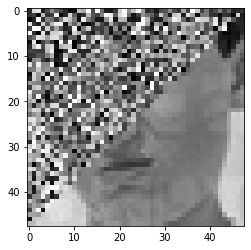

In [67]:
orgin_img = Image.open('./Training/Disgust/10018_GussianNoise.jpg')
orgin_img = np.array(orgin_img)
plt.imshow(orgin_img)
plt.show()